# Spotify Data Analysis using Python - Project
By - Radha Ramya Krishna Dommeti
INTRODUCTION


Spotify is a Swedish audio streaming and media services provider founded in April 2006. It is the world's largest music streaming service provider and has over 381 million monthly active users, which also includes 172 million paid subscribers.

Here, We'll exploring and quantify data about music and drawing valuable insights.

Perform an exploratory data analysis (EDA) and data visualization project using data from Spotify using Python.

Data analysis exploring the relationship between the audio features of a song and how positive or negative its lyrics are, involving sentiment analysis.

Includes data collection script that scrapes audio feature data from the Spotify API, as well as lyrical data from the LyricWikiAPI

Spotify Data Analysis makes use of secondary data from Spotify. Learners will use data to identify patterns and relationships between different characteristics. The activity will support learners in developing their ability to review and interpret a dataset. The activity starts by encouraging learners to think of questions that the dataset might answer and thus develop their “Problem” skills. Once the dataset has been analysed learners will have the opportunity to reorganise and restructure data to help them answer their questions

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#dataset contains songs from 1922 to 2021
df_songs=pd.read_csv(r"/Users/radharamyakrishnadommeti/Desktop/SpotifyFeatures.csv")
df_songs.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [8]:
#check for the null values
pd.isnull(df_songs)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232721,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232722,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232723,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
#count the number of null values for each column
pd.isnull(df_songs).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [10]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [11]:
#listing the top 10 least popular songs
leastpop=df_songs.sort_values("popularity",ascending=True).head(10)
leastpop

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.6110,0.389,99373,0.9100,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
74954,Children's Music,Sing n Play,"See, See My Playmate",3WaCwwpGoxLEkFmd6cpZO5,0,0.1390,0.556,150487,0.4390,0.006400,D,0.1720,-11.604,Major,0.0288,165.306,4/4,0.820
74958,Children's Music,Children Songs Company,By the God - Instrumental,5yDehr9ccZo3vBO8hZXFcK,0,0.2130,0.736,212547,0.4460,0.821000,D,0.2980,-12.328,Major,0.0504,130.011,4/4,0.668
74959,Children's Music,Children Songs Company,Interruption Please - Instrumental,6NEULw7AmTOAYRunPWcFvn,0,0.0131,0.639,184000,0.8440,0.095700,A#,0.0399,-8.582,Minor,0.0439,120.027,4/4,0.271
74961,Children's Music,Children Songs Company,Breeze,6v126eNn1A79yFIKGfvqLz,0,0.0280,0.607,147653,0.5540,0.000000,A,0.1690,-10.571,Major,0.3710,92.193,4/4,0.404
74962,Children's Music,Children Songs Company,Woodland,7qR2PWbDeuhh1Vzd0anb25,0,0.9950,0.529,266067,0.1540,0.414000,B,0.1230,-9.222,Minor,0.0470,69.588,4/4,0.332
74963,Children's Music,Children Songs Company,Cool Me - Instrumental,0V3Q9RYUaiLKTJIvg4KCST,0,0.2500,0.623,350080,0.4710,0.931000,A#,0.2580,-8.675,Major,0.0332,120.015,4/4,0.515
74964,Children's Music,Sing n Play,The Tortoise and the Hare,0oX193rf5y87RipsZnH8Pq,0,0.4960,0.563,201362,0.3460,0.000000,D,0.1200,-14.058,Major,0.0938,144.642,4/4,0.370
56153,Movie,Bruno Pelletier,Lié par le sang,3GO9Wo14FvMXvOKE4LItjg,0,0.0294,0.656,276027,0.6940,0.000017,A,0.0527,-6.755,Major,0.0273,120.085,4/4,0.449
74966,Children's Music,Children Songs Company,Forsaken,1rRNU87xfqvxiUsEXXyi8k,0,0.9940,0.429,129387,0.0382,0.000000,B,0.4480,-12.704,Major,0.0557,156.807,3/4,0.474


In [12]:
#lising the most popular top 10 songs
mostpopular=df_songs.sort_values("popularity",ascending=False).head(10)
mostpopular

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107803,Pop,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
66643,Hip-Hop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
107909,Pop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
138918,Reggaeton,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656
107829,Pop,Ava Max,Sweet but Psycho,25sgk305KZfyuqVBQIahim,97,0.0691,0.719,187436,0.704,0.000000,C#,0.1660,-4.724,Major,0.0476,133.002,4/4,0.628


In [13]:
#analyse the descriptive statistics
df_songs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


In [14]:
#change the popularity column as index
df_songs.set_index("popularity",inplace=True)
df_songs.index=pd.to_datetime(df_songs.index)
df_songs.head()

,genre,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
popularity,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000000000,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1970-01-01 00:00:00.000000001,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
1970-01-01 00:00:00.000000003,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
1970-01-01 00:00:00.000000000,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
1970-01-01 00:00:00.000000004,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [15]:
#to extract a particular row value(4th row) from a specific column(name)
df_songs["track_name"].iloc[4]

'Ouverture'

In [16]:
#convert the duration_ms column from ms to sec
df_songs['duration']=df_songs['duration_ms'].apply(lambda x: round(x/1000))   #div by 1000 to convert ms to sec 
df_songs.drop('duration_ms',inplace=True,axis=1)       #remove the duration in ms col
df_songs.duration.head(5)

popularity
1970-01-01 00:00:00.000000000     99
1970-01-01 00:00:00.000000001    137
1970-01-01 00:00:00.000000003    170
1970-01-01 00:00:00.000000000    152
1970-01-01 00:00:00.000000004     83
Name: duration, dtype: int64

In [17]:
#remove the unwanted columns like key,mode and explicit
df_songs.drop(['key','mode','tempo'],axis=1)

,genre,artist_name,track_name,track_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,time_signature,valence,duration
popularity,,,,,,,,,,,,,,
1970-01-01 00:00:00.000000000,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.61100,0.389,0.910,0.000000,0.3460,-1.828,0.0525,4/4,0.814,99
1970-01-01 00:00:00.000000001,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.24600,0.590,0.737,0.000000,0.1510,-5.559,0.0868,4/4,0.816,137
1970-01-01 00:00:00.000000003,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.95200,0.663,0.131,0.000000,0.1030,-13.879,0.0362,5/4,0.368,170
1970-01-01 00:00:00.000000000,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.70300,0.240,0.326,0.000000,0.0985,-12.178,0.0395,4/4,0.227,152
1970-01-01 00:00:00.000000004,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.95000,0.331,0.225,0.123000,0.2020,-21.150,0.0456,4/4,0.390,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000039,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,0.00384,0.687,0.714,0.544000,0.0845,-10.626,0.0316,4/4,0.962,326
1970-01-01 00:00:00.000000038,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,0.03290,0.785,0.683,0.000880,0.2370,-6.944,0.0337,4/4,0.969,282
1970-01-01 00:00:00.000000047,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,0.90100,0.517,0.419,0.000000,0.0945,-8.282,0.1480,4/4,0.813,167


In [18]:
#The Pearson correlation measures the strength of the linear relationship between two variables.
#It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.
correlation=df_songs.corr(method='pearson')
correlation

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration
acousticness,1.000000,-0.364546,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798,0.011200
danceability,-0.364546,1.000000,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154,-0.125781
energy,-0.725576,0.325807,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771,-0.030545
instrumentalness,0.316154,-0.364941,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522,0.076017
liveness,0.069004,-0.041684,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804,0.023791
loudness,-0.690202,0.438668,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901,-0.047614
speechiness,0.150935,0.134560,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842,-0.016161
tempo,-0.238247,0.021939,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857,-0.028447
valence,-0.325798,0.547154,0.436771,-0.307522,0.011804,0.399901,0.023842,0.134857,1.000000,-0.141815
duration,0.011200,-0.125781,-0.030545,0.076017,0.023791,-0.047614,-0.016161,-0.028447,-0.141815,1.000000


[Text(0.5, 0, 'acousticness'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'instrumentalness'),
 Text(4.5, 0, 'liveness'),
 Text(5.5, 0, 'loudness'),
 Text(6.5, 0, 'speechiness'),
 Text(7.5, 0, 'tempo'),
 Text(8.5, 0, 'valence'),
 Text(9.5, 0, 'duration')]

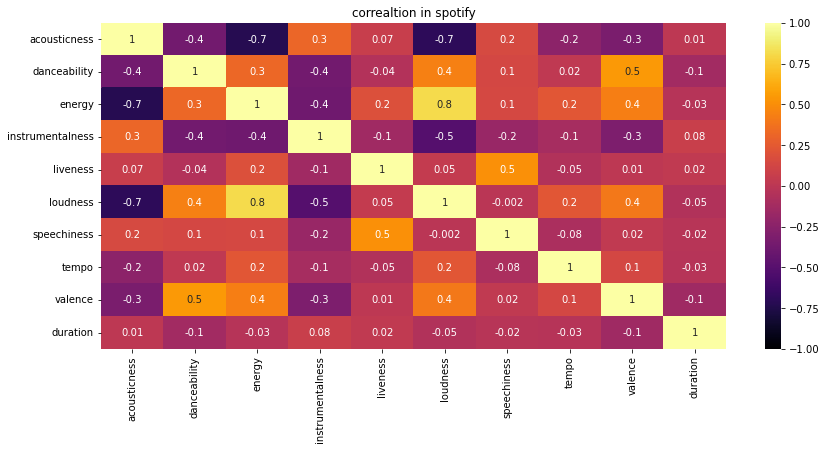

In [19]:
#visualize the values using heatmap
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(correlation,vmin=-1, vmax=1, cmap='inferno', center=0,annot=True, fmt='.1g',linewidths=0, linecolor='white')
#annot =true will write the value in each cell
#fmt - size(no. of digits to be displayed after decimal point) of the string written in annot 
heatmap.set_title('correaltion in spotify')
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)

In [20]:
#there is high positive correl bet loudness and energy
#there is a strong neg correl betenergy and acousticness

In [21]:
#as the dataset is large ,create a sample df to work on it
sample_df=df_songs.sample(int(0.004*len(df_songs)))

In [22]:
sample_df

,genre,artist_name,track_name,track_id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration
popularity,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00.000000055,Jazz,Ahmad Jamal,Ahmad's Blues,4CZfPaDW5madfScpZl0nDU,0.99000,0.5080,0.150,0.899000,F,0.1440,-20.844,Major,0.0418,173.360,3/4,0.2520,174
1970-01-01 00:00:00.000000069,Indie,Sam Tinnesz,Play With Fire (feat. Yacht Money),5sah9eLuxZlWxKTTCOk8GN,0.01620,0.5730,0.539,0.000012,D,0.1050,-6.091,Minor,0.0322,75.012,4/4,0.3900,181
1970-01-01 00:00:00.000000024,Soundtrack,Bear McCreary,Willie,5GD72B19NylfxQ5eOYadpT,0.98900,0.0982,0.120,0.910000,C,0.0657,-23.163,Major,0.0445,78.593,3/4,0.0307,122
1970-01-01 00:00:00.000000043,Reggae,The Expendables,Ganja Smugglin',5zF4D8c6j7ZVoSr6LO0CHY,0.15100,0.6620,0.617,0.379000,F#,0.1020,-8.254,Minor,0.0401,85.888,4/4,0.7930,258
1970-01-01 00:00:00.000000055,R&B,Mac Ayres,Stay,4mIneE97TsDiTsoQkFSDrX,0.58900,0.6790,0.270,0.000000,D,0.0621,-10.649,Major,0.0454,120.608,3/4,0.4150,269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000000010,Opera,Dmitri Hvorostovsky,Ne Probuzhday Vospominaniy,7KqkOTrif3SsadJyDgjWTK,0.97600,0.2770,0.162,0.016600,D#,0.0985,-18.782,Minor,0.0469,130.160,3/4,0.0758,279
1970-01-01 00:00:00.000000041,Ska,Pepper,Start You Up,77Y1opE1RLX9qfHor4MKJi,0.01060,0.7430,0.445,0.000233,F,0.0871,-8.695,Minor,0.0641,75.001,4/4,0.4180,220
1970-01-01 00:00:00.000000047,Indie,King Gizzard & The Lizard Wizard,Robot Stop,5s8XO1mnjYBYUhDh5JjkGo,0.00565,0.4650,0.988,0.198000,A,0.8600,-5.301,Major,0.1100,97.920,4/4,0.3150,322


In [23]:
len(sample_df)

930

[Text(0.5, 1.0, 'liveness vs Loudeness')]

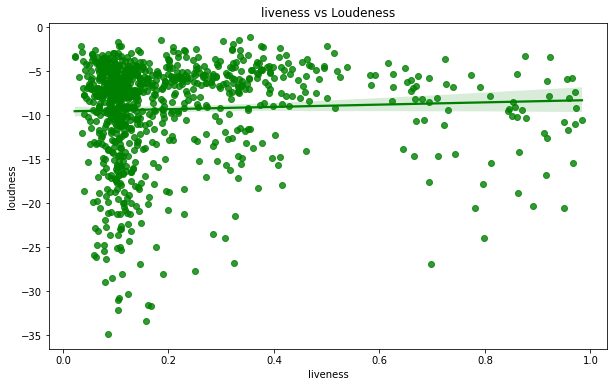

In [24]:
#as there is a correl bet liveness and loudness ,we will visualize it in regression plot
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,x='liveness',y='loudness',color='g').set(title ='liveness vs Loudeness')
#graph shows as liveliness of the song inc ,the loudness also inc.hence the reg line is upwards.

[Text(0.5, 1.0, 'tempo vs acousticness')]

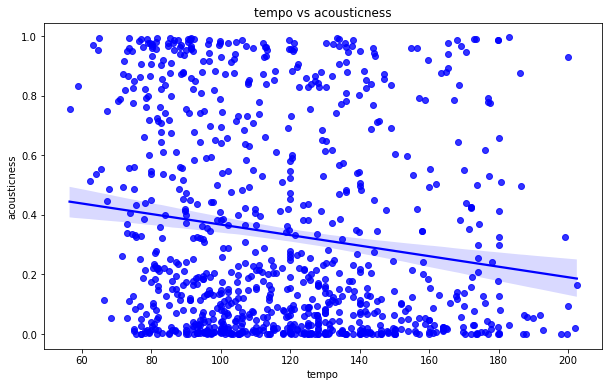

In [25]:
#let's map between tempo and acousticness
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,x='tempo',y='acousticness',color='b').set(title='tempo vs acousticness')
#the reg line is downward,as tempo inc,the acousticness dec and viseversa

In [39]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
popular = genre.sort_values('popularity', ascending=False).head(10)
sns.barplot(y ='genre', x ='popularity', data = popular).set(title='Top 5 Genres by Popularity')

NameError: name 'genre' is not defined

<Figure size 720x360 with 0 Axes>